In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyexpat import features
from sklearn.model_selection import train_test_split

In [2]:
# load your selected dataset and look at it
df = pd.read_csv('data/yyc_housing_2024.csv')

# Initial inspection
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
display(df.describe(include='all'))

Data shape: (373225, 9)

First 5 rows:


ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION  \
0    311 3 SOMERVALE VW SW        185500.0       SOM                1999.0   
1  219 VALLEY POINTE PL NW        792500.0       VAL                2012.0   
2   6555 MARTINGROVE DR NE        394500.0       MRT                1983.0   
3       75 CRANBROOK GR SE        815500.0       CRA                2018.0   
4         3872 FONDA WY SE        324000.0       FHT                1977.0   

  LAND_USE_DESIGNATION  LAND_SIZE_SM SUB_PROPERTY_USE   LATITUDE   LONGITUDE  
0                 M-C1       12990.0           RE0201  50.897013 -114.070656  
1                  R-1         458.3           RE0110  51.089562 -114.270342  
2                 R-C2         291.6           RE0110  51.112120 -113.952455  
3                  R-G         320.9           RE0110  50.862672 -113.976197  
4                 R-C2         314.1           RE0120  51.047305 -113.978818


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ADDRESS               373225 non-null  object 
 1   ASSESSED_VALUE        373225 non-null  float64
 2   COMM_CODE             373225 non-null  object 
 3   YEAR_OF_CONSTRUCTION  372935 non-null  float64
 4   LAND_USE_DESIGNATION  370707 non-null  object 
 5   LAND_SIZE_SM          373225 non-null  float64
 6   SUB_PROPERTY_USE      373225 non-null  object 
 7   LATITUDE              373225 non-null  float64
 8   LONGITUDE             373225 non-null  float64
dtypes: float64(5), object(4)
memory usage: 25.6+ MB
None

Summary statistics:


ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION  \
count            373225    3.732250e+05    373225         372935.000000   
unique           371542             NaN       218                   NaN   
top     573 REGAL PA NE             NaN       BLN                   NaN   
freq                  7             NaN      8319                   NaN   
mean                NaN    5.734863e+05       NaN           1992.300034   
std                 NaN    3.178183e+05       NaN             20.957173   
min                 NaN    3.000000e+03       NaN           1890.000000   
25%                 NaN    3.905000e+05       NaN           1978.000000   
50%                 NaN    5.340000e+05       NaN           1997.000000   
75%                 NaN    6.885000e+05       NaN           2008.000000   
max                 NaN    1.683000e+07       NaN           2032.000000   

       LAND_USE_DESIGNATION   LAND_SIZE_SM SUB_PROPERTY_USE       LATITUDE  \
count                370707  373225.000000           373225  373225.000000   
unique                   89            NaN                6            NaN   
top                    R-C1            NaN           RE0110            NaN   
freq                 112531            NaN           237775            NaN   
mean                    NaN    2610.096415              NaN      51.038205   
std                     NaN    7511.147002              NaN       0.091745   
min                     NaN       0.000000              NaN      50.848536   
25%                     NaN     364.000000              NaN      50.955046   
50%                     NaN     500.500000              NaN      51.049923   
75%                     NaN     805.900000              NaN      51.116551   
max                     NaN  138843.500000              NaN      51.192276   

            LONGITUDE  
count   373225.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      -114.070499  
std          0.087123  
min       -114.277334  
25%       -114.131243  
50%       -114.076810  
75%       -113.990687  
max       -113.895174

In [3]:
# YEAR OF CONSTRUCTION and LAND_USE_DESIGNATION has missing values. We will handle those accordingly later on

### Exploring Data


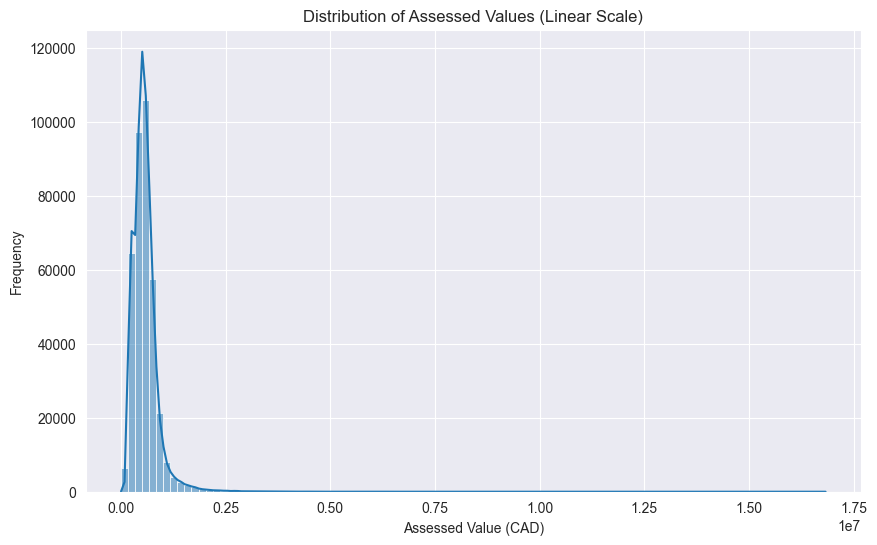

In [4]:
# Distribution of assessed value
df['LOG_ASSESSED_VALUE'] = np.log1p(df['ASSESSED_VALUE'])

# Histogram with kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df['ASSESSED_VALUE'], bins=100, kde=True, log_scale=False)
plt.title('Distribution of Assessed Values (Linear Scale)')
plt.xlabel('Assessed Value (CAD)')
plt.ylabel('Frequency')
plt.show()

# 1 bin = 0.0175

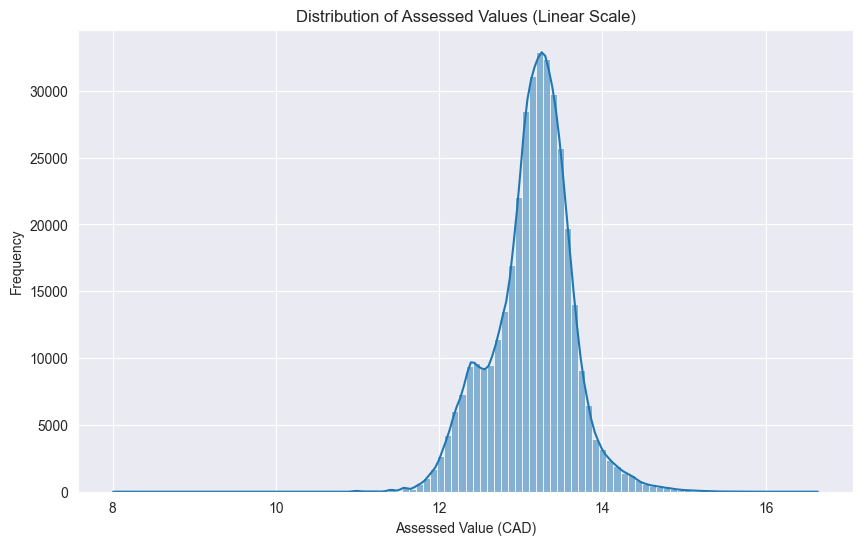

In [5]:
df['LOG_ASSESSED_VALUE'] = np.log1p(df['ASSESSED_VALUE'])  # For model accuracy

plt.figure(figsize=(10, 6))
sns.histplot(df['LOG_ASSESSED_VALUE'], bins=100, kde=True)
plt.title('Distribution of Assessed Values (Linear Scale)')
plt.xlabel('Assessed Value (CAD)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Feature engineering for odd numbered houses

# Extract numeric part from ADDRESS (e.g., "311" from "311 3 SOMERVALE VW SW")
df['HOUSE_NUMBER'] = df['ADDRESS'].str.extract(r'(\d+)').astype(float)
df['IS_ODD'] = df['HOUSE_NUMBER'] % 2

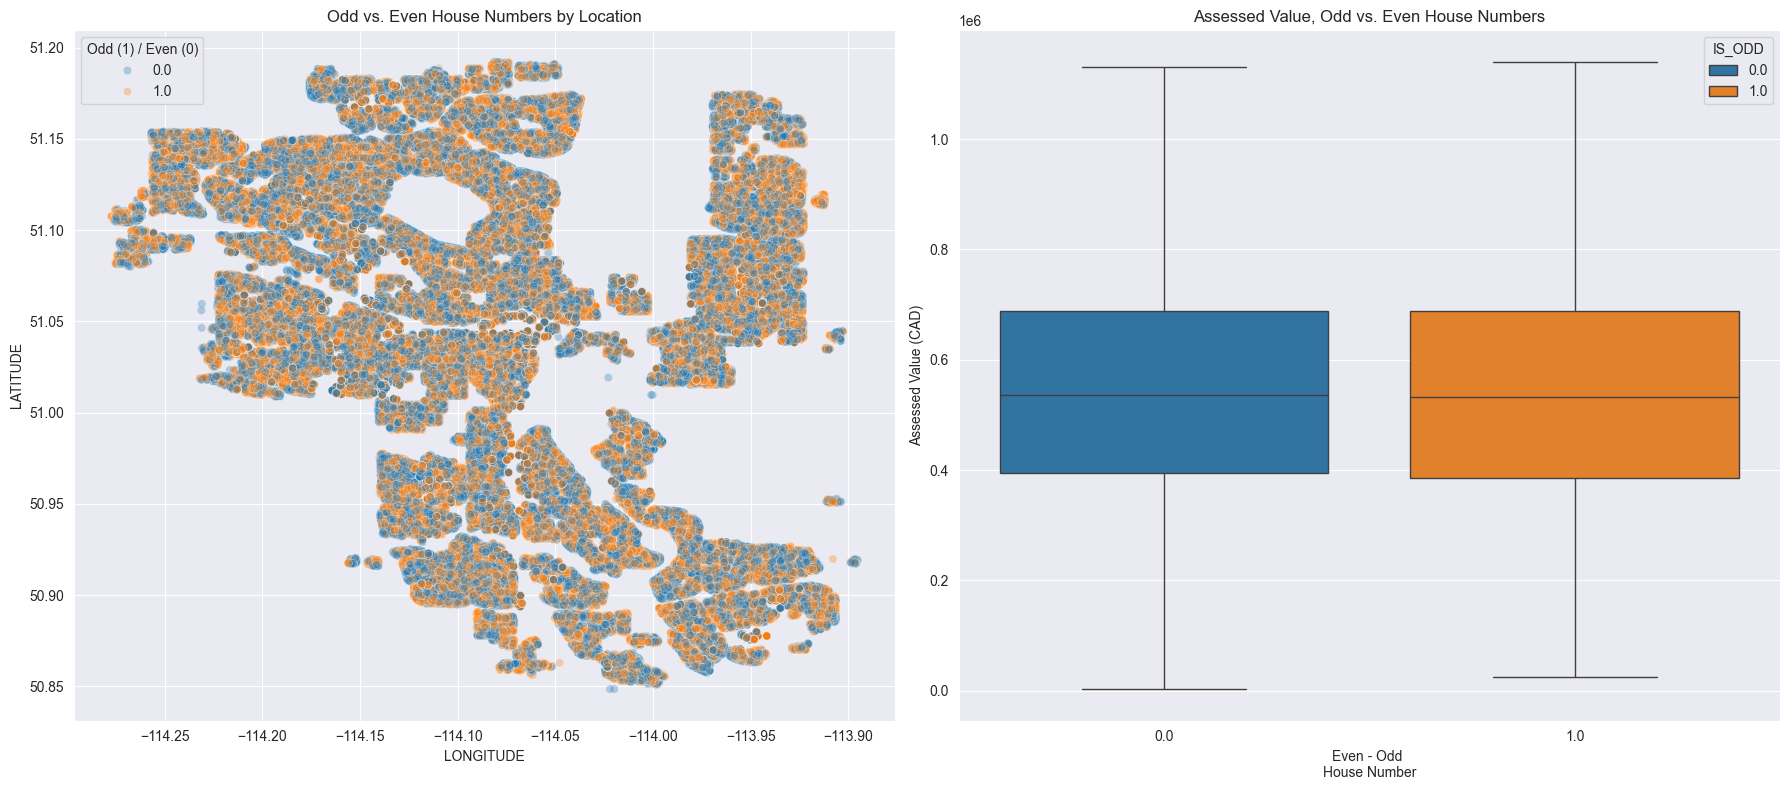

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Scatterplot: Odd vs. Even House Numbers by Location
sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', hue='IS_ODD',
    data=df, palette='tab10', alpha=0.3, ax=axes[0]
)
axes[0].set_title('Odd vs. Even House Numbers by Location')
axes[0].legend(title='Odd (1) / Even (0)')

# Boxplot: Assessed Value, Odd vs. Even House Numbers
sns.boxplot(
    x='IS_ODD', y='ASSESSED_VALUE', data=df, palette='tab10', hue='IS_ODD', showfliers=False, ax=axes[1]
)
axes[1].set_title('Assessed Value, Odd vs. Even House Numbers')
axes[1].set_xlabel('Even - Odd \nHouse Number')
axes[1].set_ylabel('Assessed Value (CAD)')

# Adjust layout for better spacing
plt.tight_layout()

# Show both plots side by side
plt.show()

In [8]:
# Observed that even or odd numbered properties don't affect assessed value

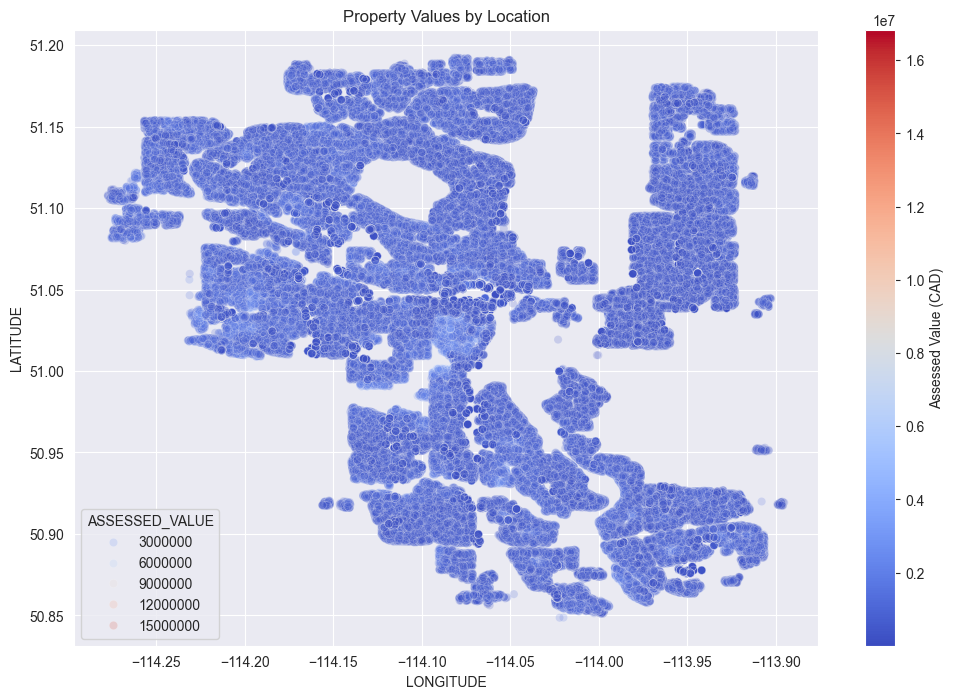

In [9]:
# Geographic patterns (latitude and longitude)

plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get the current Axes

# Use "coolwarm" or "RdYlBu" for a blue-to-red gradient
scatter = sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', data=df,
    hue='ASSESSED_VALUE', palette='coolwarm', alpha=0.2, ax=ax
)

plt.title('Property Values by Location')

# Add colorbar explicitly
norm = plt.Normalize(df['ASSESSED_VALUE'].min(), df['ASSESSED_VALUE'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Required for ScalarMappable

# Add colorbar to the current Axes
plt.colorbar(sm, ax=ax, label='Assessed Value (CAD)')

plt.show()

In [10]:
# Noticed that more expensive properties are clustered in downtown

In [11]:
# Year of construction vs Assessed Value
# Min, Max Year of construction: 1890, 2032
# Here we are trying to derive a new category column for the era a property was built, and if it has a relationship with the assessed value

def assign_era(year):
    if year < 1900:
        return 'Pre-1900'
    elif 1900 <= year < 1950:
        return '1900-1949'
    elif 1950 <= year < 2000:
        return '1950-1999'
    elif 2000 <= year < 2020:
        return '2000-2019'
    else:
        return '2020+'


df['ERA'] = df['YEAR_OF_CONSTRUCTION'].apply(assign_era)

In [12]:
# Same here, we are trying to derive a new category column for the quadrant a property is located, and if it has a relationship with the assessed value
# And maybe if the ERA combined with the QUADRANT has a relationship

# Function to extract quadrant
def extract_quadrant(address):
    if pd.isna(address):  # Handle missing values
        return 'Other'

    # Extract the last two characters
    suffix = address.strip()[-2:].upper()

    # Check if it's a valid quadrant
    if suffix in ['NW', 'NE', 'SW', 'SE']:
        return suffix
    else:
        return 'Other'


# Apply the function
df['QUADRANT'] = df['ADDRESS'].apply(extract_quadrant)

In [13]:
# Feature engineering - price per square meter

# Check for infinities
pd.set_option('display.expand_frame_repr', False)
df[(df['LAND_SIZE_SM'] == 0)]

# LAND USE DESIGNATION, MU-1 = Mixed Use - General District, (MU-1)
# We see that most land sizes of 0 are LAND USE DESIGNATION MU-1, with a few R-C2, and SUB PROPERTY TYPE RE0201, with few RE0120.
# Note the COMM CODE, just like the LAND USE DESIGNATION, They are in a specific community.
# We won't depend on community code alone and add QUADRANT they are located. From describing the data, there are 218 unique COMM_CODES with the top having a freq of
# So this might data entry error or placeholder for non measured land size. Further, we see that these properties with land size zero are houses constructed after 2020, ie 2021+ (ERA '2020+')

# SUB PROPERTY USE, RE0201 = Low Rise Apartment Condo
# SUB PROPERTY USE, RE0120 = Duplex

# Are multiple COMM CODES in different QUADRANTS? Let's check for more accuracy

ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION LAND_USE_DESIGNATION  LAND_SIZE_SM SUB_PROPERTY_USE   LATITUDE   LONGITUDE  LOG_ASSESSED_VALUE  HOUSE_NUMBER  IS_ODD    ERA QUADRANT
27575   204 205 SPRING CREEK CM SW        264000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.483708         204.0     0.0  2020+       SW
32378   211 205 SPRING CREEK CM SW        316000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.663501         211.0     1.0  2020+       SW
49645   413 205 SPRING CREEK CM SW        266000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.491255         413.0     1.0  2020+       SW
57409   302 205 SPRING CREEK CM SW        263000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.479913         302.0     0.0  2020+       SW
66162   407 205 SPRING CREEK CM SW        323500.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.686957         407.0     1.0  2020+       SW
84822   309 205 SPRING CREEK CM SW        263000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.479913         309.0     1.0  2020+       SW
94853   417 205 SPRING CREEK CM SW        290500.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.579362         417.0     1.0  2020+       SW
128887  205 205 SPRING CREEK CM SW        352500.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.772809         205.0     1.0  2020+       SW
133318  306 205 SPRING CREEK CM SW        299500.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.609873         306.0     0.0  2020+       SW
133842  216 205 SPRING CREEK CM SW        272000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.513561         216.0     0.0  2020+       SW
135510  404 205 SPRING CREEK CM SW        270000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.506181         404.0     0.0  2020+       SW
142319  304 205 SPRING CREEK CM SW        267000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.495008         304.0     0.0  2020+       SW
150827  213 205 SPRING CREEK CM SW        260000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.468441         213.0     1.0  2020+       SW
151344  311 205 SPRING CREEK CM SW        320000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.676079         311.0     1.0  2020+       SW
152280  411 205 SPRING CREEK CM SW        323500.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.686957         411.0     1.0  2020+       SW
164012         3905 CENTRE B ST NW        665000.0       HPK                2023.0                 R-C2           0.0           RE0120  51.087330 -114.064512           13.407544        3905.0     1.0  2020+       NW
176172  409 205 SPRING CREEK CM SW        266000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.035837 -114.209927           12.491255         409.0     1.0  2020+       SW
177939  406 205 SPRING CREEK CM SW        303000.0       SPH                2021.0                 MU-1           0.0           RE0201  51.

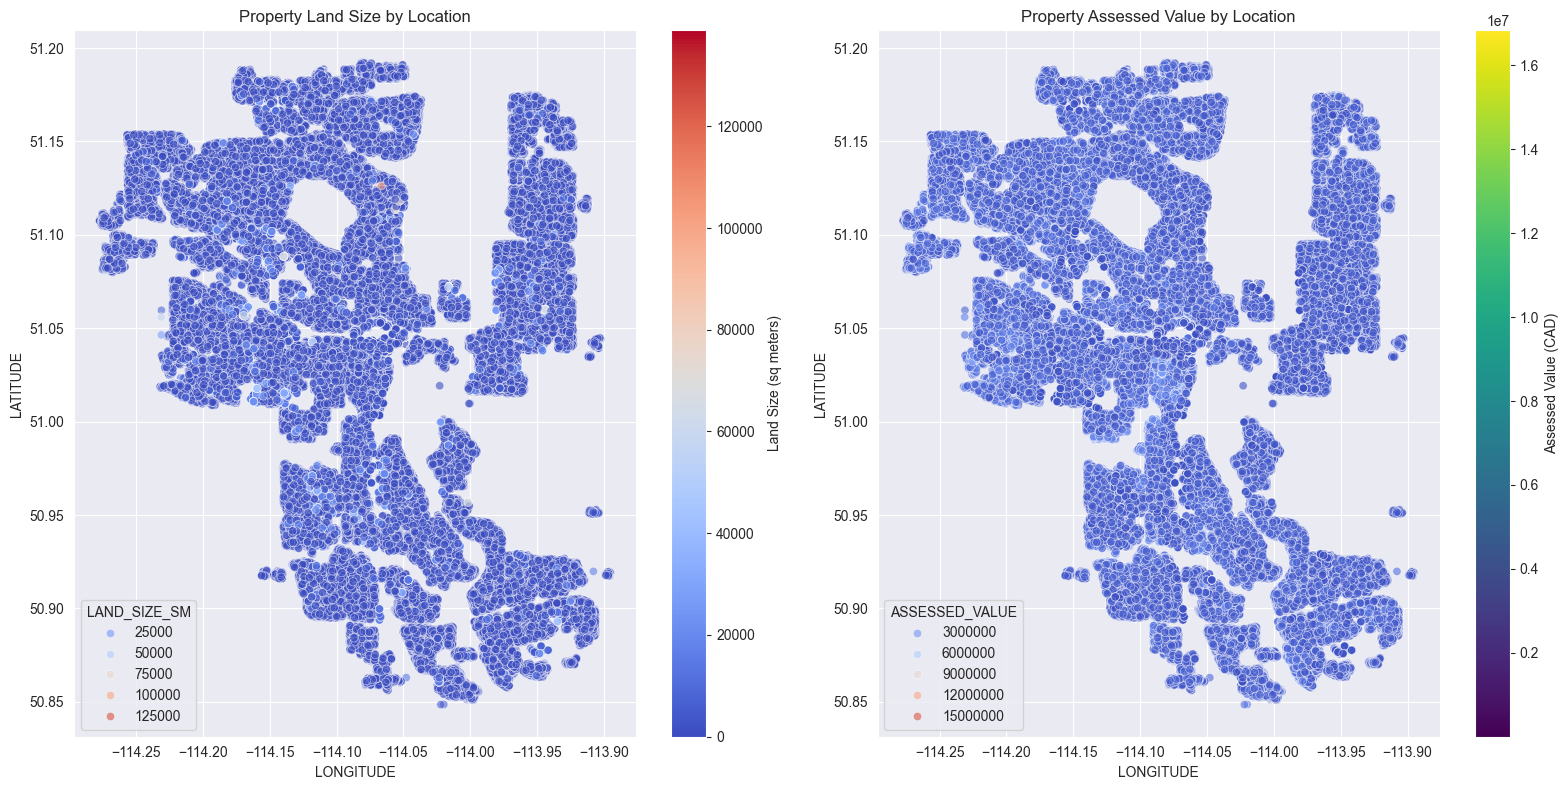

In [14]:
# Before proceeding, we want to contextually impute the land sizes of 0 (assuming it's a placeholder to unentered data)
# and if land size affects assessed value

# So we remove all land sizes of 0 for accuracy.
# Create a figure with two subplots side by side


dfcopy = df.copy()
dfcopy = dfcopy[dfcopy["LAND_SIZE_SM"] != 0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for LAND_SIZE_SM
scatter1 = sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', data=dfcopy,
    hue='LAND_SIZE_SM', palette='coolwarm', alpha=0.6, ax=axes[0]
)
axes[0].set_title('Property Land Size by Location')

# Add colorbar for LAND_SIZE_SM
norm = plt.Normalize(df['LAND_SIZE_SM'].min(), df['LAND_SIZE_SM'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Required for ScalarMappable
plt.colorbar(sm, ax=axes[0], label='Land Size (sq meters)')

# Plot for ASSESSED_VALUE (example)
scatter2 = sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', data=dfcopy,
    hue='ASSESSED_VALUE', palette='coolwarm', alpha=0.6, ax=axes[1]
)
axes[1].set_title('Property Assessed Value by Location')

# Add colorbar for ASSESSED_VALUE
norm = plt.Normalize(df['ASSESSED_VALUE'].min(), df['ASSESSED_VALUE'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Required for ScalarMappable
plt.colorbar(sm, ax=axes[1], label='Assessed Value (CAD)')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Here, we see that the Land Size does not, from the observation that land sizes in downtown are even compared all around the area

In [15]:
# From the graph above, Land Size isn't affected by assessed value. So we can replace Land size of 0 with contextual imputing
# From looking at a table above with all land sizes of 0, we found at a particular Land Size of 0 had a specific criteria.
# Replace Land size of 0 with the median values grouped SUB_PROPERTY_USE, ERA, COMM CODE, QUADRANT for more accuracy.
# Basically replacing with the median of Land sizes with the same UB_PROPERTY_USE, ERA, COMM CODE, QUADRANT for more accuracy.


# Replacing LAND SIZE of 0 with informed impute
def replace_land_size(df):
    low_rise_apartment_condo_median = df[
        (df['SUB_PROPERTY_USE'] == 'RE0201') &
        (df['ERA'] == '2020+') &
        (df['COMM_CODE'] == 'SPH') &
        (df['QUADRANT'] == 'SW') &
        (df['LAND_SIZE_SM'] != 0)
        ]['LAND_SIZE_SM'].median()

    # Calculate the median for duplexes (RE0120)
    duplex_median = df[
        (df['SUB_PROPERTY_USE'] == 'RE0120') &
        (df['ERA'] == '2020+') &
        (df['COMM_CODE'] == 'HPK') &
        (df['QUADRANT'] == 'NW') &
        (df['LAND_SIZE_SM'] != 0)
        ]['LAND_SIZE_SM'].median()

    # Replace infinities and NaNs with the respective medians
    df['LAND_SIZE_SM'] = np.where(
        ((df['LAND_SIZE_SM'] == 0) | pd.isna(df['LAND_SIZE_SM'])) &
        (df['SUB_PROPERTY_USE'] == 'RE0201') &
        (df['COMM_CODE'] == 'SPH') &
        (df['QUADRANT'] == 'SW') &
        (df['LAND_USE_DESIGNATION'] == 'MU-1'),
        low_rise_apartment_condo_median,
        df['LAND_SIZE_SM']
    )

    df['LAND_SIZE_SM'] = np.where(
        ((df['LAND_SIZE_SM'] == 0) | pd.isna(df['LAND_SIZE_SM'])) &
        (df['SUB_PROPERTY_USE'] == 'RE0120') &
        (df['COMM_CODE'] == 'HPK') &
        (df['QUADRANT'] == 'NW') &
        (df['LAND_USE_DESIGNATION'] == 'R-C2'),
        duplex_median,
        df['LAND_SIZE_SM']
    )

    return df


df = replace_land_size(df)

print("Infinities:", np.isinf(df['LAND_SIZE_SM']).sum())
print("NaN values:", df['LAND_SIZE_SM'].isna().sum())

# All Land Sizes of 0 have been handled.

Infinities: 0
NaN values: 0


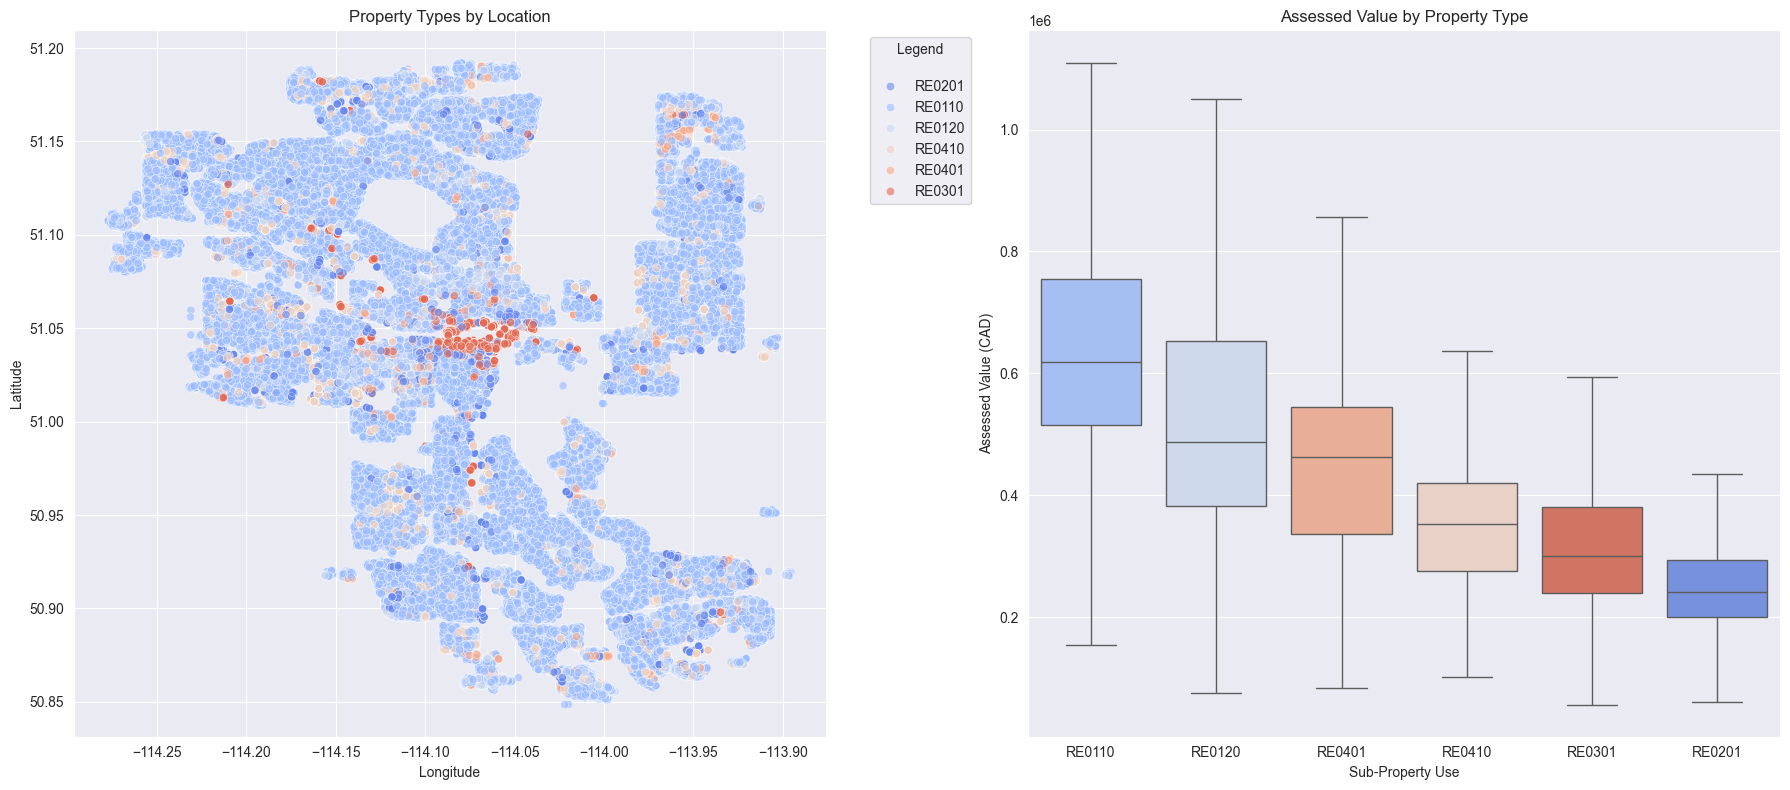

In [16]:
# Property Types by Location
# RE0301 - High Rise Apartment Condo

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Scatter plot for Property Types by Location
sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', hue='SUB_PROPERTY_USE',
    data=df, palette='coolwarm', alpha=0.6, ax=axes[0]
)
axes[0].set_title('Property Types by Location')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend\n')

# Second plot: Boxplot for Assessed Value by Property Type
sub_type_order = df.groupby('SUB_PROPERTY_USE')['ASSESSED_VALUE'].median().sort_values(ascending=False).index

sns.boxplot(
    x='SUB_PROPERTY_USE',
    y='ASSESSED_VALUE',
    hue='SUB_PROPERTY_USE',
    data=df,
    palette='coolwarm',
    showfliers=False,  
    order=sub_type_order,
    ax=axes[1]
)
axes[1].set_title('Assessed Value by Property Type')
axes[1].set_xlabel('Sub-Property Use')
axes[1].set_ylabel('Assessed Value (CAD)')

plt.tight_layout()
plt.show()

# Note: While the scatter plot earlier showed that downtown properties are slightly more expensive, the box plot reveals that the median price 
# of residential houses is higher than that of high-rise condos. This is because there are far more residential homes, and their prices span a 
# wider range, which skews the data.

In [17]:

stats = df.groupby('SUB_PROPERTY_USE')['ASSESSED_VALUE'].agg(
    ['median', 'count']
).reset_index()

stats

# Observed here

SUB_PROPERTY_USE    median   count
0           RE0110  619000.0  237775
1           RE0120  488000.0   26716
2           RE0201  241500.0   38390
3           RE0301  301000.0   22353
4           RE0401  463000.0    9375
5           RE0410  352500.0   38616

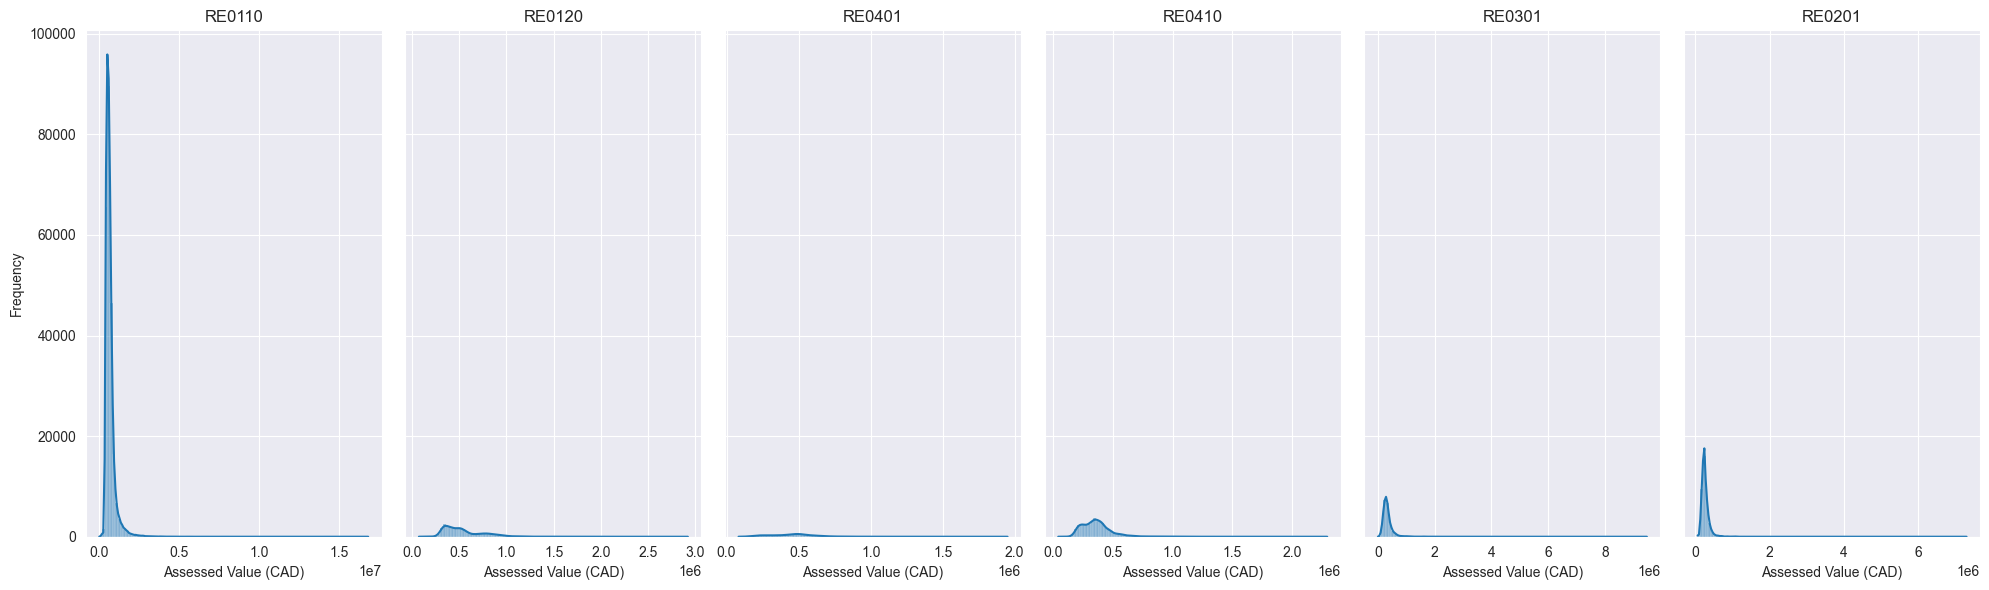

In [18]:
property_uses = df['SUB_PROPERTY_USE'].unique()
property_medians = df.groupby('SUB_PROPERTY_USE')['ASSESSED_VALUE'].median().sort_values(ascending=False)

# Create subplots with enough space for all property uses
ab, axes = plt.subplots(1, len(property_uses), figsize=(20, 6), sharey=True)

for i, property_use in enumerate(property_medians.index.tolist()):
    df_property_use = df[df['SUB_PROPERTY_USE'] == property_use]
    sns.histplot(df_property_use['ASSESSED_VALUE'], bins=100, kde=True, log_scale=False, ax=axes[i])
    axes[i].set_title(f'{property_use}')
    axes[i].set_xlabel('Assessed Value (CAD)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Observing the skewness of the data

In [19]:
display(df[df['YEAR_OF_CONSTRUCTION'].isna()])

# Checking for NaNs in YEAR_OF_CONSTRUCTION

ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION LAND_USE_DESIGNATION  LAND_SIZE_SM SUB_PROPERTY_USE   LATITUDE   LONGITUDE  LOG_ASSESSED_VALUE  HOUSE_NUMBER  IS_ODD    ERA QUADRANT
678      77 ROCKCLIFF TC NW        509500.0       ROC                   NaN                 R-C1         515.7           RE0110  51.152496 -114.238955           13.141187          77.0     1.0  2020+       NW
1071      509 1319 14 AV SW        106000.0       BLN                   NaN                   DC        1510.0           RE0301  51.040264 -114.092631           11.571204         509.0     1.0  2020+       SW
2218     1605 1319 14 AV SW        106000.0       BLN                   NaN                   DC        1510.0           RE0301  51.040264 -114.092631           11.571204        1605.0     1.0  2020+       SW
5824     1002 1319 14 AV SW        106000.0       BLN                   NaN                   DC        1510.0           RE0301  51.040264 -114.092631           11.571204        1002.0     0.0  2020+       SW
6800      118 8535 19 AV SE        172000.0       BVD                   NaN                  M-1         103.9           RE0410  51.034935 -113.909652           12.055256         118.0     0.0  2020+       SE
...                     ...             ...       ...                   ...                  ...           ...              ...        ...         ...                 ...           ...     ...    ...      ...
367876  158 DISCOVERY DR SW        210000.0       DIS                   NaN                  M-G         101.1           RE0410  51.010075 -114.191163           12.254868         158.0     0.0  2020+       SW
368057   1108 1319 14 AV SW        106000.0       BLN                   NaN                   DC        1510.0           RE0301  51.040264 -114.092631           11.571204        1108.0     0.0  2020+       SW
368192    207 1319 14 AV SW        106000.0       BLN                   NaN                   DC        1510.0           RE0301  51.040264 -114.092631           11.571204         207.0     1.0  2020+       SW
371286    804 1319 14 AV SW        106000.0       BLN                   NaN                   DC        1510.0           RE0301  51.040264 -114.092631           11.571204         804.0     0.0  2020+       SW
372361    20918 SETON WY SE         46500.0       SET                   NaN                  M-1        8903.9           RE0410  50.864095 -113.950598           10.747229       20918.0     0.0  2020+       SE

[290 rows x 14 columns]

In [20]:
# From the display, the range of LAND USES, SUB PROP TYPE with COMM CODE is large.
# So we need to do an informed impute
# We will impute based 'LAND_USE_DESIGNATION', 'QUADRANT', 'COMM_CODE', we avoid SUB_PROPERTY_USE because it is specific to residential

def fill_yoc(df):
    criteria = ['LAND_USE_DESIGNATION', 'QUADRANT', 'COMM_CODE']

    year_imputation_values = df.groupby(criteria)['YEAR_OF_CONSTRUCTION'].median()

    df['YEAR_OF_CONSTRUCTION'] = df.apply(
        lambda row: year_imputation_values.loc[tuple(row[criteria])] if pd.isna(row['YEAR_OF_CONSTRUCTION']) else row[
            'YEAR_OF_CONSTRUCTION'],
        axis=1
    )

    return df


df = fill_yoc(df)

print(f'Number of N/A Year of construction: {df['YEAR_OF_CONSTRUCTION'].isna().sum()}')

# Missing YEAR_OF_CONSTRUCTION handled.

Number of N/A Year of construction: 0


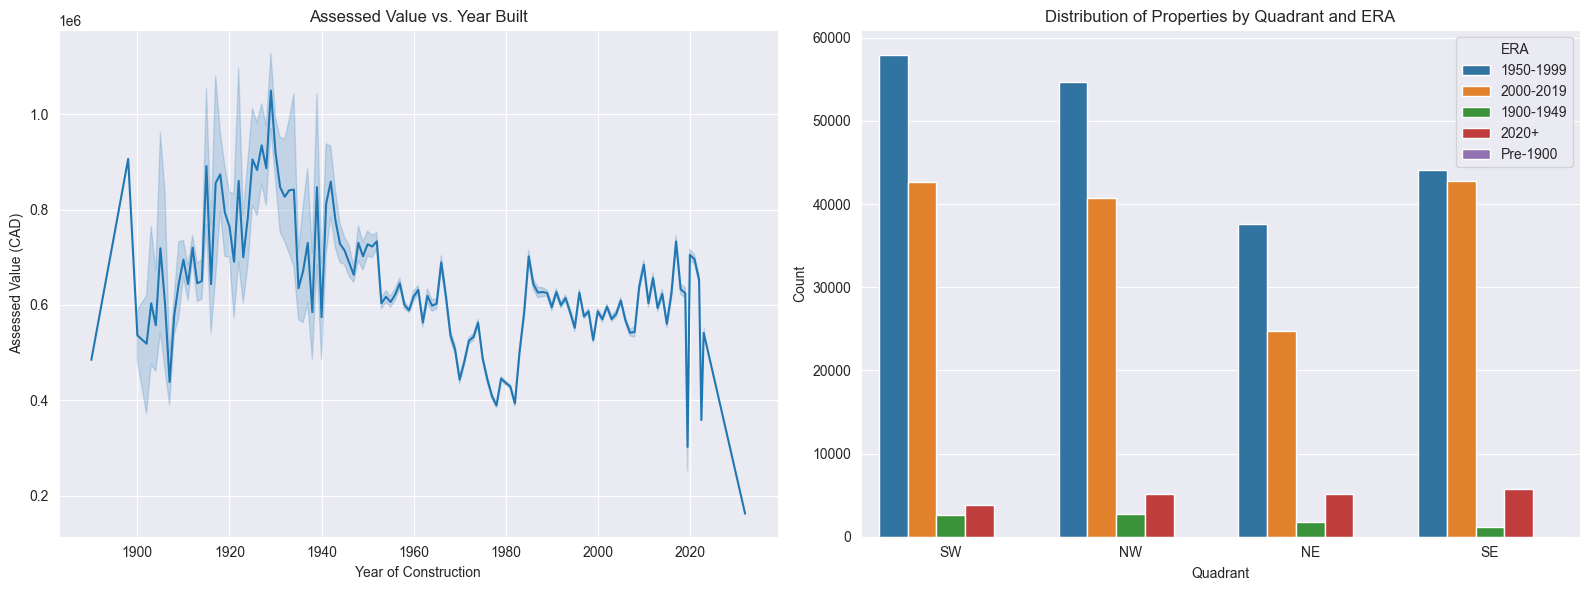

In [21]:
# Year built against assessed value and Quadrant Count
ab, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1 Line plot of Assessed Value vs. Year Built
sns.lineplot(x='YEAR_OF_CONSTRUCTION', y='ASSESSED_VALUE', data=df, ax=axes[0])
axes[0].set_title('Assessed Value vs. Year Built')
axes[0].set_xlabel('Year of Construction')
axes[0].set_ylabel('Assessed Value (CAD)')

# Plot 2 Count plot for QUADRANT with ERA as hue
sns.countplot(x='QUADRANT', data=df, palette='tab10', hue='ERA', ax=axes[1])
axes[1].set_title('Distribution of Properties by Quadrant and ERA')
axes[1].set_xlabel('Quadrant')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Observed that properties in NW and SW have most older homes, and seeing the price of older
# are more than newer ones, we can assume that houses in NW and SW are more expensive

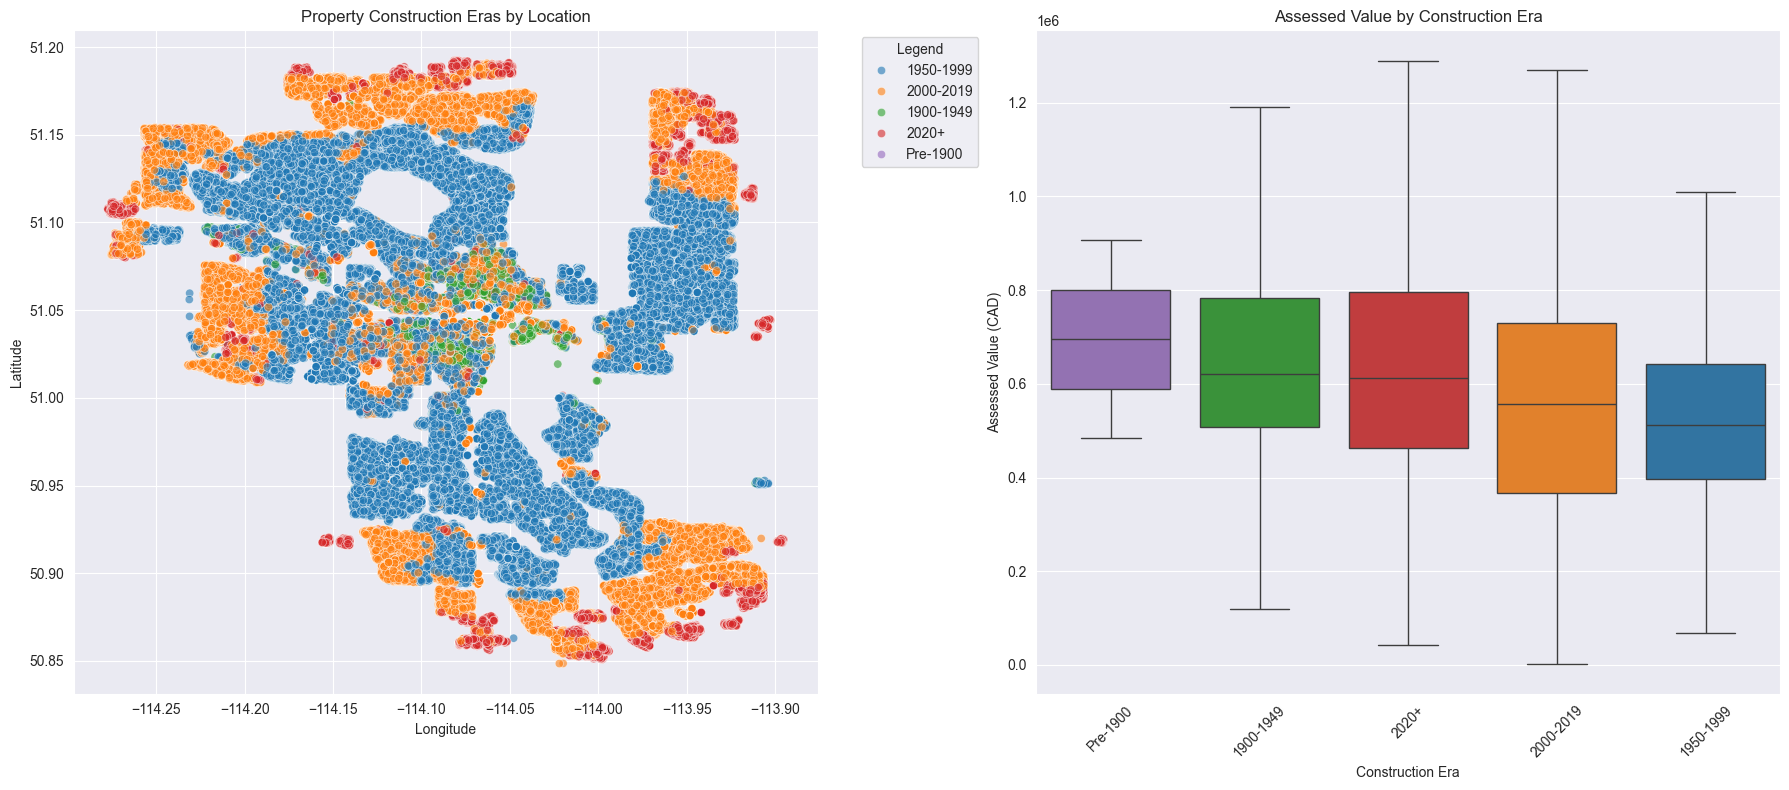

In [22]:
ab, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Property Construction Eras by Location
sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', hue='ERA',
    data=df, palette='tab10', alpha=0.6, ax=axes[0]
)
axes[0].set_title('Property Construction Eras by Location')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')

# Assessed Value by Construction Era
order_era = df.groupby('ERA')['ASSESSED_VALUE'].median().sort_values(ascending=False)

sns.boxplot(
    x='ERA', y='ASSESSED_VALUE',
    data=df, palette='tab10', order=order_era.index.tolist(), showfliers=False, hue='ERA', ax=axes[1]
)
axes[1].set_title('Assessed Value by Construction Era')
axes[1].set_xlabel('Construction Era')
axes[1].set_ylabel('Assessed Value (CAD)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Observing the ERA distribution, it's natural to see that older houses are concentrated in the city center, while newer houses expand outward.

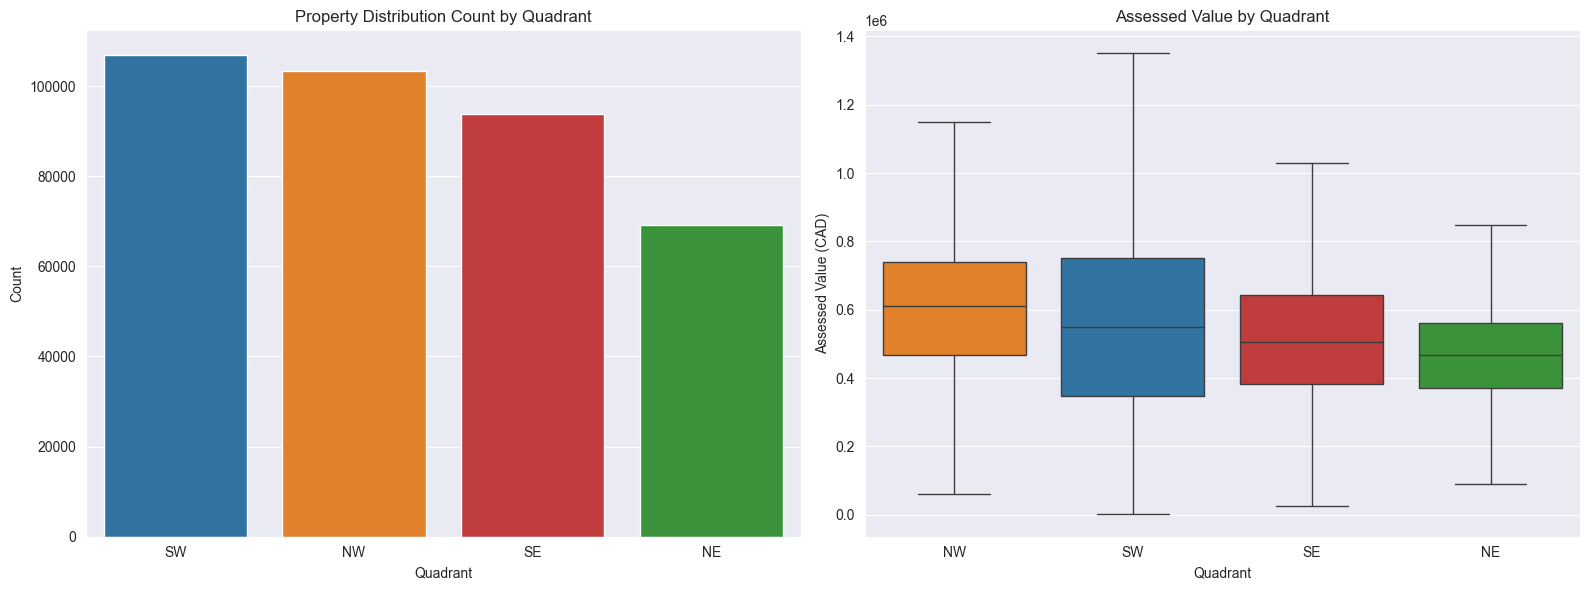

In [23]:
# Calculate order based on property count (descending)
quadrant_counts = df['QUADRANT'].value_counts()

# Calculate order based on median assessed value (descending)
value_order = df.groupby('QUADRANT')['ASSESSED_VALUE'].median().sort_values(ascending=False).index


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x='QUADRANT', data=df, palette='tab10', hue='QUADRANT', order=quadrant_counts.index, ax=axes[0])
axes[0].set_title('Property Distribution Count by Quadrant')
axes[0].set_xlabel('Quadrant')
axes[0].set_ylabel('Count')

# Box plot for Assessed Value by Quadrant (sorted by median value)
sns.boxplot(x='QUADRANT', y='ASSESSED_VALUE', hue='QUADRANT', data=df, palette='tab10',
            showfliers=False, order=value_order, ax=axes[1])
axes[1].set_title('Assessed Value by Quadrant')
axes[1].set_xlabel('Quadrant')
axes[1].set_ylabel('Assessed Value (CAD)')

plt.tight_layout()
plt.show()

# Confirming what we observed earlier, prices in NW and SW are higher than the other quadrants.

In [24]:
# Handling missing values for LAND_USE_DESIGNATION

display(df[df['LAND_USE_DESIGNATION'].isna()])
display(df[df['LAND_USE_DESIGNATION'].isna()].describe(include='all'))

# Trying to find the most freq categories/columns of most missing LAND_USE_DESIGNATION, for impute criteria.
# And as we can the most frequent SUB PROP USE is RE0110 with 807 appearances out of 2518. too small, find another column
# Most QUADRANT is SW with 1408, better is ERA, houses between 1950-1999 with freq of 1781
# We can merge the criteria for QUADRANT and ERA, excluding SUB PROP USE bc it is limited to Residential homes

# From the ERA alone, we can assume most of these un-designated land uses are under old properties

ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION LAND_USE_DESIGNATION  LAND_SIZE_SM SUB_PROPERTY_USE   LATITUDE   LONGITUDE  LOG_ASSESSED_VALUE  HOUSE_NUMBER  IS_ODD        ERA QUADRANT
212     7202 400 EAU CLAIRE AV SW       1070000.0       EAU                1995.0                  NaN       10270.0           RE0201  51.052972 -114.070311           13.883170        7202.0     0.0  1950-1999       SW
387                 1918 12 ST SW       1130000.0       UMR                1920.0                  NaN         603.5           RE0110  51.035771 -114.090856           13.937729        1918.0     0.0  1900-1949       SW
668            66 PANATELLA VI NW        359000.0       PAN                2007.0                  NaN         142.0           RE0410  51.164123 -114.089355           12.791080          66.0     0.0  2000-2019       NW
787                  130 24 AV SW        547500.0       MIS                1990.0                  NaN         607.0           RE0401  51.031818 -114.065898           13.213120         130.0     0.0  1950-1999       SW
817           109 ST MORITZ PL SW        798500.0       SPH                2005.0                  NaN         440.1           RE0110  51.036378 -114.214802           13.590491         109.0     1.0  2000-2019       SW
...                           ...             ...       ...                   ...                  ...           ...              ...        ...         ...                 ...           ...     ...        ...      ...
372610        123 TREMBLANT WY SW        842000.0       SPH                2006.0                  NaN         451.7           RE0110  51.033693 -114.214947           13.643536         123.0     1.0  2000-2019       SW
372631              2023 28 ST SW       1130000.0       KIL                1991.0                  NaN         580.0           RE0110  51.035484 -114.128260           13.937729        2023.0     1.0  1950-1999       SW
373052               408 56 AV SW        590500.0       WND                1994.0                  NaN         278.9           RE0110  51.003776 -114.071991           13.288727         408.0     0.0  1950-1999       SW
373105      53 VALLEY WOODS WY NW       1010000.0       VAL                2006.0                  NaN         698.3           RE0110  51.098654 -114.263996           13.825462          53.0     1.0  2000-2019       NW
373189   112 TUSCANY RAVINE HT NW        964500.0       TUS                2007.0                  NaN         512.9           RE0120  51.111279 -114.232605           13.779366         112.0     0.0  2000-2019       NW

[2518 rows x 14 columns]

ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION LAND_USE_DESIGNATION  LAND_SIZE_SM SUB_PROPERTY_USE     LATITUDE    LONGITUDE  LOG_ASSESSED_VALUE  HOUSE_NUMBER       IS_ODD        ERA QUADRANT
count              2518    2.518000e+03      2518           2518.000000                    0   2518.000000             2518  2518.000000  2518.000000         2518.000000   2518.000000  2518.000000       2518     2518
unique             2516             NaN        52                   NaN                    0           NaN                6          NaN          NaN                 NaN           NaN          NaN          4        4
top     2109 HOPE ST SW             NaN       POI                   NaN                  NaN           NaN           RE0110          NaN          NaN                 NaN           NaN          NaN  1950-1999       SW
freq                  2             NaN       310                   NaN                  NaN           NaN              807          NaN          NaN                 NaN           NaN          NaN       1781     1408
mean                NaN    6.937458e+05       NaN           1984.788324                  NaN   6504.393527              NaN    51.048322  -114.127079           13.216088   1052.920572     0.474980        NaN      NaN
std                 NaN    6.408348e+05       NaN             22.084176                  NaN   9158.500197              NaN     0.046277     0.069998            0.640845   1697.320838     0.499473        NaN      NaN
min                 NaN    9.450000e+04       NaN           1908.000000                  NaN    121.400000              NaN    50.903577  -114.265123           11.456366      1.000000     0.000000        NaN      NaN
25%                 NaN    3.720000e+05       NaN           1978.000000                  NaN    570.800000              NaN    51.032852  -114.178331           12.826652     80.250000     0.000000        NaN      NaN
50%                 NaN    5.305000e+05       NaN           1994.000000                  NaN   1820.000000              NaN    51.051294  -114.141767           13.181577    305.000000     0.000000        NaN      NaN
75%                 NaN    7.718750e+05       NaN           1999.000000                  NaN   6963.575000              NaN    51.061466  -114.077628           13.556579   1403.750000     1.000000        NaN      NaN
max                 NaN    8.290000e+06       NaN           2023.000000                  NaN  57350.000000              NaN    51.166495  -113.929229           15.930561  15241.000000     1.000000        NaN      NaN

In [25]:
# From the display, the range of SUB PROP TYPE with COMM CODE is large.
# So we need to narrow our informed impute
# We will impute based QUADRANT, ERA of properties for generability,
# rather than specific year, comm code or value to reduce over complication

def fill_land_use_design(df):

    criteria = ['QUADRANT', 'ERA']

    # Group by criteria and calculate the mode of LAND_USE_DESIGNATION
    mode_imputation_values = df.groupby(criteria)['LAND_USE_DESIGNATION'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )

    df['LAND_USE_DESIGNATION'] = np.where(
        pd.isna(df['LAND_USE_DESIGNATION']),  # Check if LAND_USE_DESIGNATION is NaN
        mode_imputation_values,  # Replace NaN with the mode value
        df['LAND_USE_DESIGNATION']  # Keep the original value if not NaN
    )

    return df


df = fill_land_use_design(df)

print(f'Number of N/A Year of construction: {df['LAND_USE_DESIGNATION'].isna().sum()}')

# Missing LAND_USE_DESIGNATION handled

Number of N/A Year of construction: 0


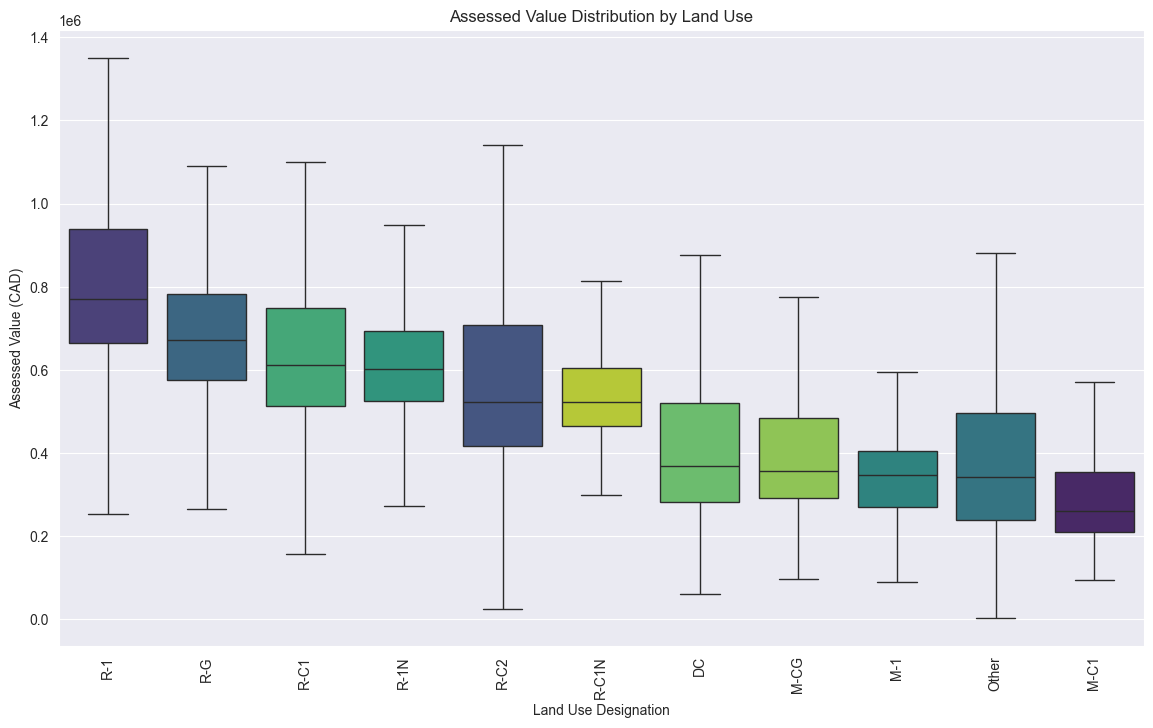

In [26]:
# Land use visualization by assessed value
top_land_uses = df['LAND_USE_DESIGNATION'].value_counts().head(10).index
df['LAND_USE'] = df['LAND_USE_DESIGNATION'].where(
    df['LAND_USE_DESIGNATION'].isin(top_land_uses), 'Other'
)

land_use_medians = df.groupby('LAND_USE')['ASSESSED_VALUE'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='LAND_USE',
    y='ASSESSED_VALUE',
    data=df,
    palette='viridis',
    hue='LAND_USE',
    legend=False,
    order=land_use_medians.index.tolist(),
    showfliers=False
)
plt.xticks(rotation=90)
plt.title('Assessed Value Distribution by Land Use')
plt.xlabel('Land Use Designation')
plt.ylabel('Assessed Value (CAD)')
plt.show()

df.drop(columns=['LAND_USE'], inplace=True)

# Observing assessed value across top distributed land uses

In [27]:
# A derived column from grouping land uses. Finding relationship to target column (assessed value)

# Group Land Use Designation
def group_land_use(land_use):
    if isinstance(land_use, str): 
        if 'R-' in land_use:
            return 'Residential'
        elif 'M-' in land_use:
            return 'Multi-Residential'
        elif 'C-' in land_use and 'CC-' not in land_use:
            return 'Commercial'
        elif 'I-' in land_use:
            return 'Industrial'
        elif 'S-' in land_use:
            return 'Special Purpose'
        elif 'CC-' in land_use or 'R20' in land_use:
            return 'City Centre Districts'
        elif 'MU-' in land_use:
            return 'Mixed Use'
        elif 'DC' in land_use:
            return 'Direct Control District'
        else:
            return 'Undesignated Road Right-of-Way'
    else:
        return 'Other' 


df['LAND_USE_GROUPED'] = df['LAND_USE_DESIGNATION'].apply(group_land_use)

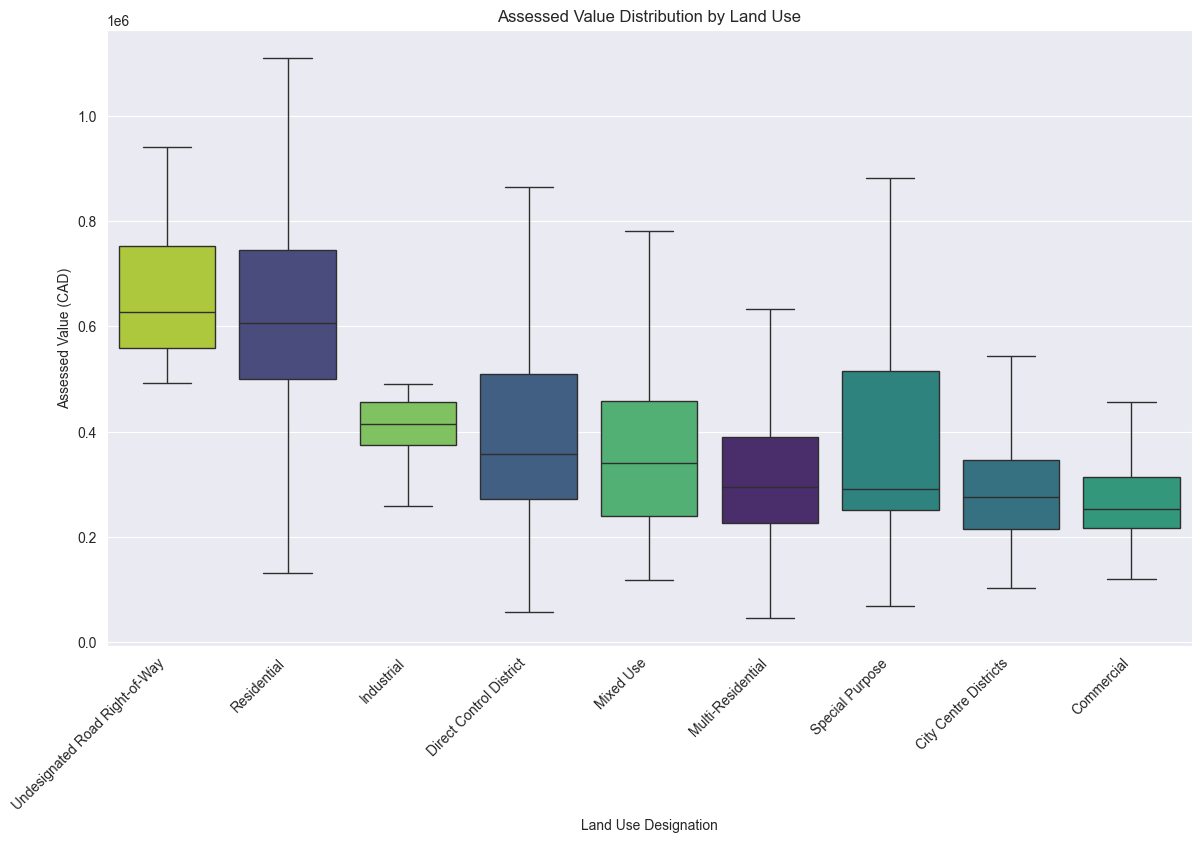

In [28]:
order = df.groupby('LAND_USE_GROUPED')['ASSESSED_VALUE'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='LAND_USE_GROUPED',
    y='ASSESSED_VALUE',
    data=df,
    palette='viridis',
    hue='LAND_USE_GROUPED',
    legend=False,
    order=order.index,  
    showfliers=False
)

plt.xticks(rotation=45, ha='right') 
plt.title('Assessed Value Distribution by Land Use')
plt.xlabel('Land Use Designation')
plt.ylabel('Assessed Value (CAD)')
plt.show()

# Observing grouped land uses by assessed value. Notices residential has a high median (skewed data)

In [29]:
# Print the counts of each grouped land use
df['LAND_USE_GROUPED'].value_counts()

LAND_USE_GROUPED
Residential                       261326
Multi-Residential                  75699
Direct Control District            26683
City Centre Districts               6953
Commercial                          1696
Mixed Use                            591
Special Purpose                      246
Undesignated Road Right-of-Way        21
Industrial                            10
Name: count, dtype: int64

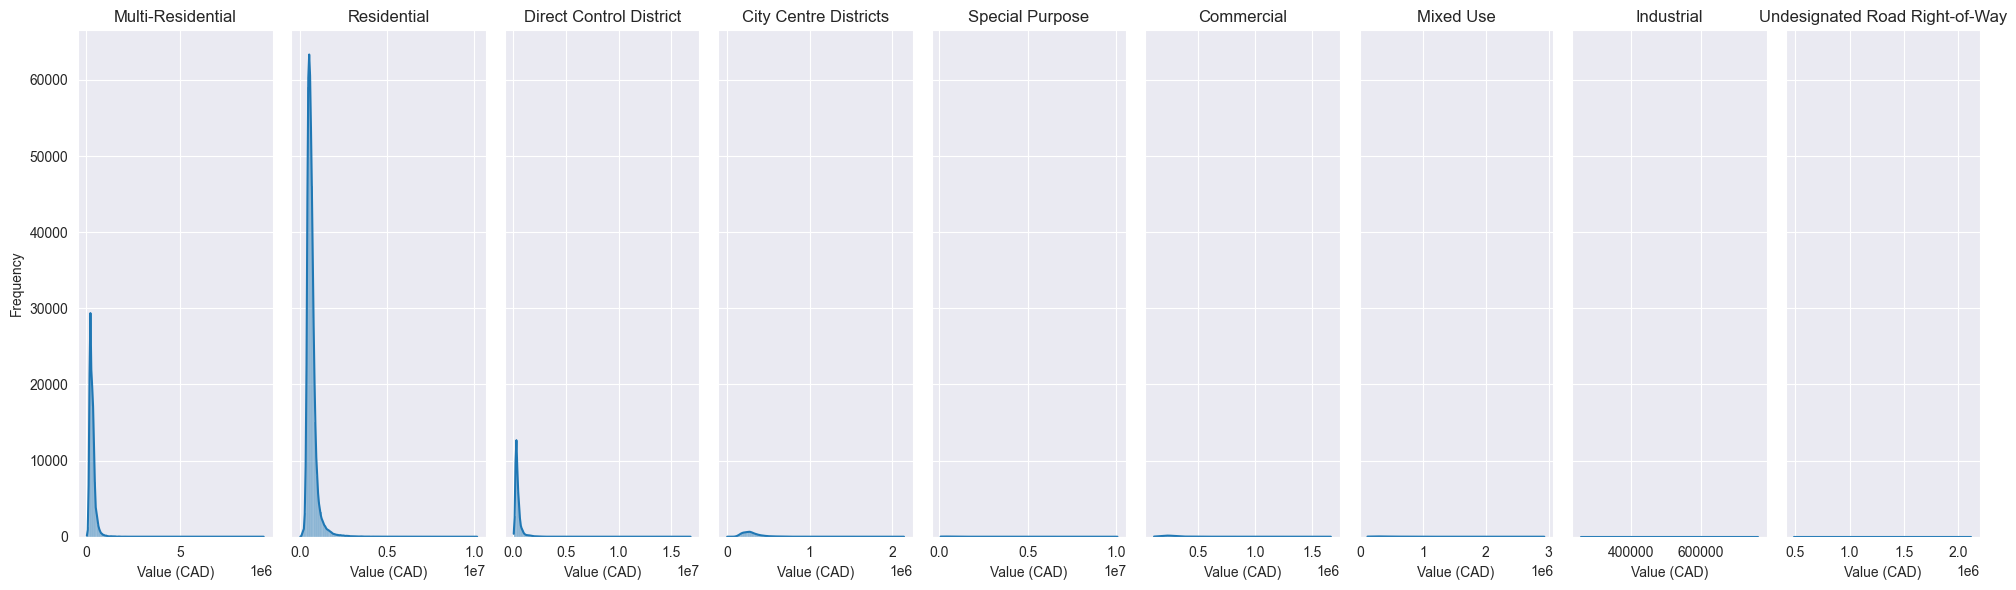

In [30]:
land_use_groups = df['LAND_USE_GROUPED'].unique()

fig, axes = plt.subplots(1, len(land_use_groups), figsize=(20, 6), sharey=True)

for i, land_use_group in enumerate(land_use_groups):
    df_land_use_group = df[df['LAND_USE_GROUPED'] == land_use_group]
    sns.histplot(df_land_use_group['ASSESSED_VALUE'], bins=100, kde=True, log_scale=False, ax=axes[i])
    axes[i].set_title(f'{land_use_group}')
    axes[i].set_xlabel('Value (CAD)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Further oberseving the skewness of the data

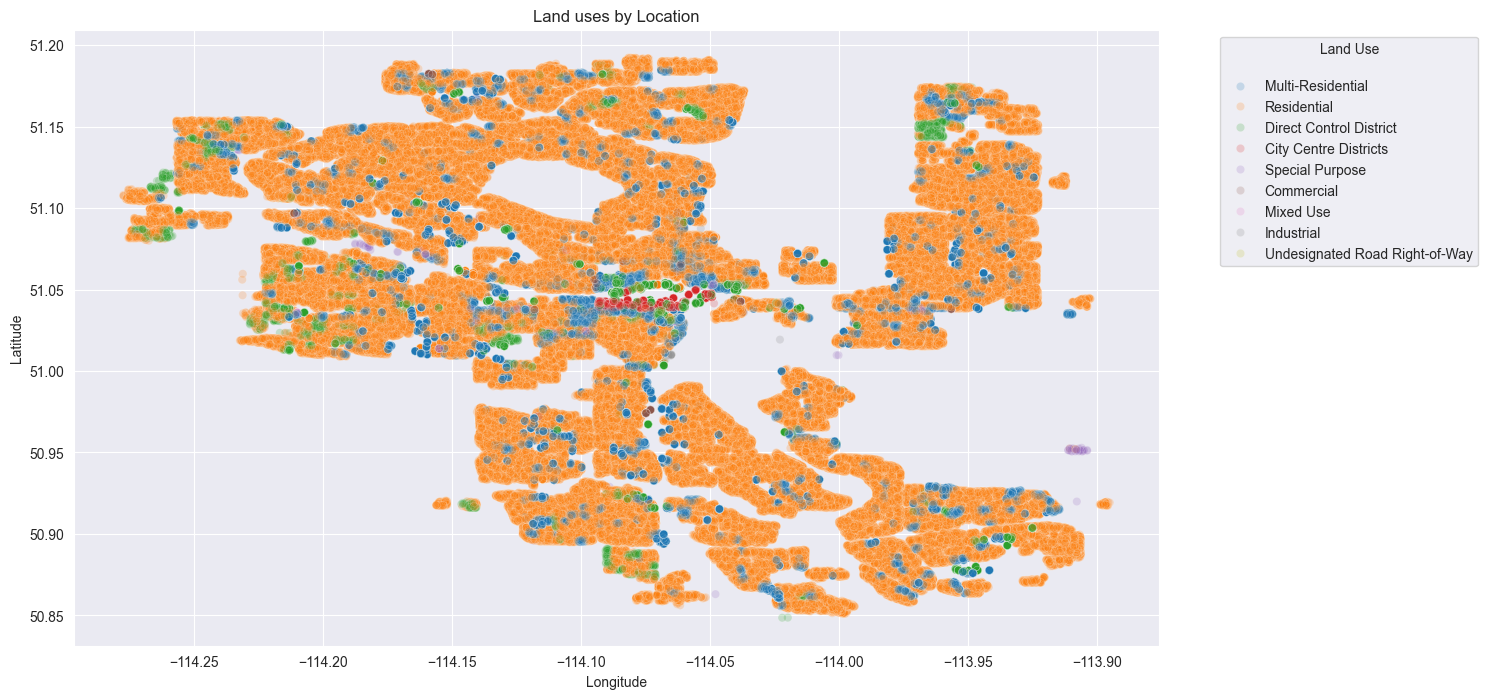

In [31]:
# Scatter plot of land uses by location
plt.figure(figsize=(14, 8))

sns.scatterplot(
    x='LONGITUDE', y='LATITUDE', hue='LAND_USE_GROUPED',
    data=df, palette='tab10', alpha=0.2
)

plt.title('Land uses by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Land Use\n')

plt.show()

# Observing downtown has more particular type of properties

In [32]:
df.groupby('QUADRANT')['LAND_USE_GROUPED'].value_counts().unstack(fill_value=0)

LAND_USE_GROUPED  City Centre Districts  Commercial  Direct Control District  Industrial  Mixed Use  Multi-Residential  Residential  Special Purpose  Undesignated Road Right-of-Way
QUADRANT                                                                                                                                                                            
NE                                    0         130                     4407           1         97              13717        50772                1                               2
NW                                    0         471                     5060           0        116              18991        78601               75                               8
SE                                 1497         155                     4750           1         28              18962        68331               38                               0
SW                                 5456         940                    12466           8        350              24029        63622              132                              11

In [33]:
# No Checkin for missing data - NO MISSING DATA
print(df.info())
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ADDRESS               373225 non-null  object 
 1   ASSESSED_VALUE        373225 non-null  float64
 2   COMM_CODE             373225 non-null  object 
 3   YEAR_OF_CONSTRUCTION  373225 non-null  float64
 4   LAND_USE_DESIGNATION  373225 non-null  object 
 5   LAND_SIZE_SM          373225 non-null  float64
 6   SUB_PROPERTY_USE      373225 non-null  object 
 7   LATITUDE              373225 non-null  float64
 8   LONGITUDE             373225 non-null  float64
 9   LOG_ASSESSED_VALUE    373225 non-null  float64
 10  HOUSE_NUMBER          373225 non-null  float64
 11  IS_ODD                373225 non-null  float64
 12  ERA                   373225 non-null  object 
 13  QUADRANT              373225 non-null  object 
 14  LAND_USE_GROUPED      373225 non-null  object 
dtype

ADDRESS  ASSESSED_VALUE COMM_CODE  YEAR_OF_CONSTRUCTION LAND_USE_DESIGNATION   LAND_SIZE_SM SUB_PROPERTY_USE       LATITUDE      LONGITUDE  LOG_ASSESSED_VALUE   HOUSE_NUMBER         IS_ODD        ERA QUADRANT LAND_USE_GROUPED
count            373225    3.732250e+05    373225         373225.000000               373225  373225.000000           373225  373225.000000  373225.000000       373225.000000  373225.000000  373225.000000     373225   373225           373225
unique           371542             NaN       218                   NaN                   89            NaN                6            NaN            NaN                 NaN            NaN            NaN          5        4                9
top     573 REGAL PA NE             NaN       BLN                   NaN                 R-C1            NaN           RE0110            NaN            NaN                 NaN            NaN            NaN  1950-1999       SW      Residential
freq                  7             NaN      8319                   NaN               114460            NaN           237775            NaN            NaN                 NaN            NaN            NaN     194334   107014           261326
mean                NaN    5.734863e+05       NaN           1992.316053                  NaN    2610.581692              NaN      51.038205    -114.070499           13.140647    1143.083314       0.494324        NaN      NaN              NaN
std                 NaN    3.178183e+05       NaN             20.958617                  NaN    7511.135539              NaN       0.091745       0.087123            0.488542    2268.371127       0.499968        NaN      NaN              NaN
min                 NaN    3.000000e+03       NaN           1890.000000                  NaN       2.800000              NaN      50.848536    -114.277334            8.006701       1.000000       0.000000        NaN      NaN              NaN
25%                 NaN    3.905000e+05       NaN           1978.000000                  NaN     364.000000              NaN      50.955046    -114.131243           12.875186      82.000000       0.000000        NaN      NaN              NaN
50%                 NaN    5.340000e+05       NaN           1997.000000                  NaN     500.500000              NaN      51.049923    -114.076810           13.188153     216.000000       0.000000        NaN      NaN              NaN
75%                 NaN    6.885000e+05       NaN           2008.000000                  NaN     806.600000              NaN      51.116551    -113.990687           13.442272    1003.000000       1.000000        NaN      NaN              NaN
max                 NaN    1.683000e+07       NaN           2032.000000                  NaN  138843.500000              NaN      51.192276    -113.895174           16.638674   21210.000000       1.000000        NaN      NaN              NaN

### Looking for Correlations

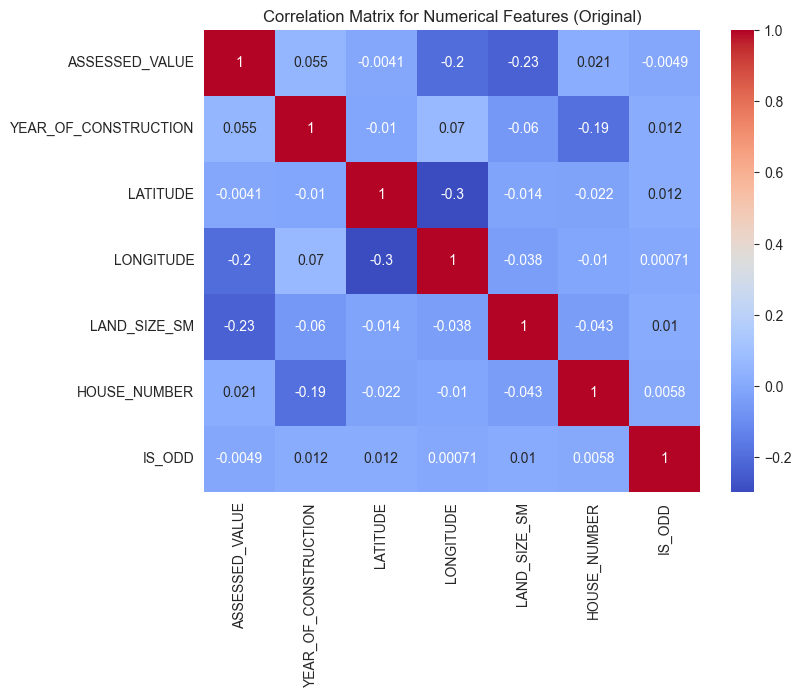

In [34]:
# Correlation matrix

numerical_features_1 = ['ASSESSED_VALUE', 'YEAR_OF_CONSTRUCTION', 'LATITUDE', 'LONGITUDE', 'LAND_SIZE_SM',
                        'HOUSE_NUMBER', 'IS_ODD']
corr_matrix_1 = df[numerical_features_1].corr()

fig, ax = plt.subplots(figsize=(8, 6))

# Heat map for the correlation matrix
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix for Numerical Features (Original)')

plt.show()

# Noting high correlation columns to assessed value

In [35]:
print("Missing values after imputation:")
print(df.isnull().sum())

# Double-checking for missing data

Missing values after imputation:
ADDRESS                 0
ASSESSED_VALUE          0
COMM_CODE               0
YEAR_OF_CONSTRUCTION    0
LAND_USE_DESIGNATION    0
LAND_SIZE_SM            0
SUB_PROPERTY_USE        0
LATITUDE                0
LONGITUDE               0
LOG_ASSESSED_VALUE      0
HOUSE_NUMBER            0
IS_ODD                  0
ERA                     0
QUADRANT                0
LAND_USE_GROUPED        0
dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373225 entries, 0 to 373224
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ADDRESS               373225 non-null  object 
 1   ASSESSED_VALUE        373225 non-null  float64
 2   COMM_CODE             373225 non-null  object 
 3   YEAR_OF_CONSTRUCTION  373225 non-null  float64
 4   LAND_USE_DESIGNATION  373225 non-null  object 
 5   LAND_SIZE_SM          373225 non-null  float64
 6   SUB_PROPERTY_USE      373225 non-null  object 
 7   LATITUDE              373225 non-null  float64
 8   LONGITUDE             373225 non-null  float64
 9   LOG_ASSESSED_VALUE    373225 non-null  float64
 10  HOUSE_NUMBER          373225 non-null  float64
 11  IS_ODD                373225 non-null  float64
 12  ERA                   373225 non-null  object 
 13  QUADRANT              373225 non-null  object 
 14  LAND_USE_GROUPED      373225 non-null  object 
dtype

### Preparing Data & Training 


In [37]:
def apply_derived_columns(df):
    df["LOG_LAND_SIZE"] = np.log(df["LAND_SIZE_SM"] + 1)
    df['ERA'] = df['YEAR_OF_CONSTRUCTION'].apply(assign_era)
    df['QUADRANT'] = df['ADDRESS'].apply(extract_quadrant)
    df = replace_land_size(df)

    # this will have all the derived cols
    return df

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import joblib

# Apply derived columns
# Compute Property Age and Age Factor
df_model = apply_derived_columns(df)

df["LOG_LAND_SIZE"] = np.log(df["LAND_SIZE_SM"] + 1)

target = "ASSESSED_VALUE"
X = df_model.drop(columns=[target])
y = df_model[target]

# Splitting data into train and test sets (80% train, 20% test (validation?)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = [
    "LAND_SIZE_SM", "LONGITUDE", "YEAR_OF_CONSTRUCTION",
    "LATITUDE", "LOG_LAND_SIZE"
]

categorical_features = [
    "COMM_CODE", "LAND_USE_DESIGNATION", "SUB_PROPERTY_USE",
    "ERA", "QUADRANT", "LAND_USE_GROUPED"
]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

model = RandomForestRegressor()

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", model)
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'preprocessing_pipeline_and_model.pkl')

['preprocessing_pipeline_and_model.pkl']

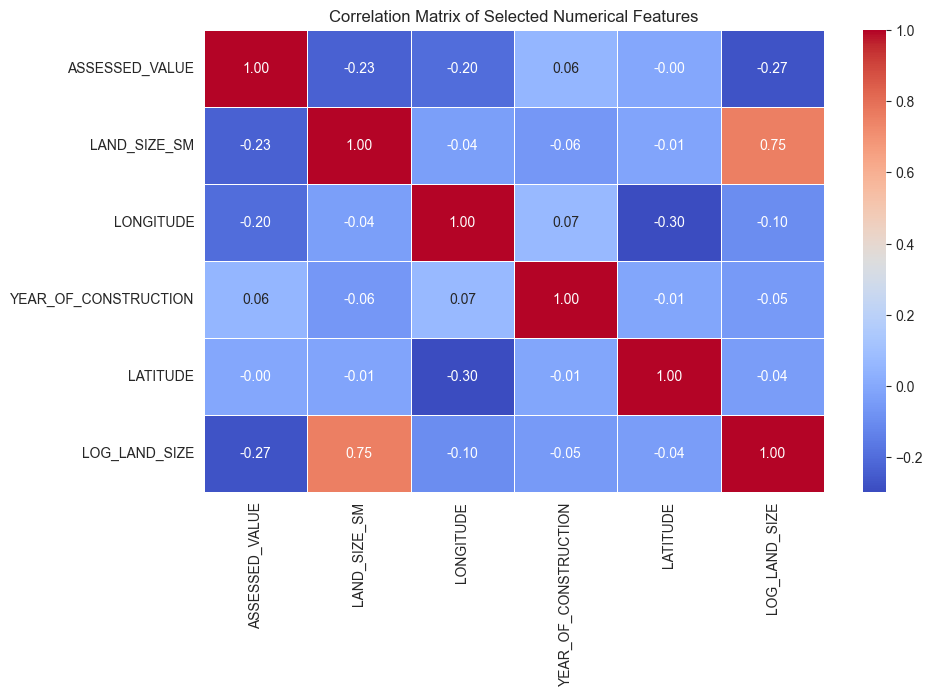

In [44]:
numerical_features_1 = ["ASSESSED_VALUE", "LAND_SIZE_SM", "LONGITUDE", "YEAR_OF_CONSTRUCTION",
    "LATITUDE", "LOG_LAND_SIZE"]
corr_matrix_1 = df[numerical_features_1].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Selected Numerical Features")
plt.show()

In [45]:
# Convenient function to evaluate performance (From lecture example notebook)
from sklearn.metrics import mean_absolute_error
def plot_predictions(actual, pred):
    plt.scatter(actual, pred, alpha=0.1)
    plt.plot([0, 17500000], [0, 17500000], color="red")
    plt.xlabel("Actual House Value ($)")
    plt.ylabel("Predicted House Value ($)")
    mae = mean_absolute_error(actual, pred)
    plt.text(300000, 10000, f"MAE = ${mae:.2f}")

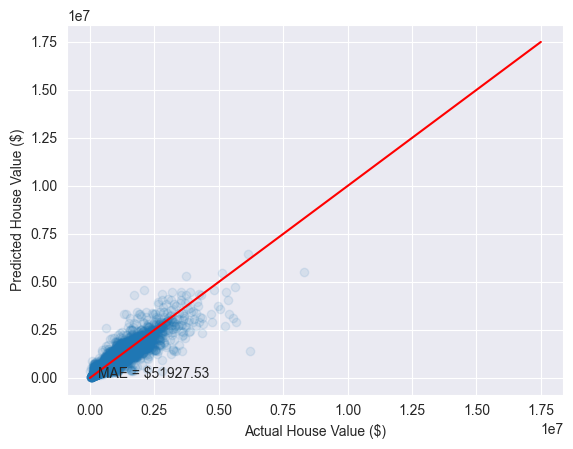

In [46]:
y_pred = pipeline.predict(X_test)
plot_predictions(y_test, y_pred)

In [47]:
from sklearn.metrics import mean_absolute_error

absolute_errors = np.abs(y_test - y_pred)
relative_errors = absolute_errors / y_test  

# Mean Relative Error (MRE)
mean_relative_error = np.mean(relative_errors)

# Median Relative Error (MdRE) 
median_relative_error = np.median(relative_errors)

# Print results
print(f"Mean Absolute Error (MAE): ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Relative Error (MRE): {mean_relative_error:.2%}") 
print(f"Median Relative Error (MdRE): {median_relative_error:.2%}")

Mean Absolute Error (MAE): $51927.53
Mean Relative Error (MRE): 9.01%
Median Relative Error (MdRE): 5.91%
